In [3]:
from langgraph.graph import Graph
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(model_name="deepseek-r1-distill-llama-70b")

In [5]:
llm.invoke("what is machine learning?").content

'<think>\n\n</think>\n\nMachine learning is a subset of artificial intelligence (AI) that involves the use of algorithms and statistical models to enable machines to perform a specific task without using explicit instructions, instead relying on patterns and inference from data. In other words, machine learning allows computers to learn from and make decisions based on data, improving their performance on a task over time.\n\n### Key Concepts:\n1. **Data**: Machine learning relies on data to train models. This data can be structured (e.g., tables) or unstructured (e.g., images, text).\n2. **Algorithms**: These are the methods used to train models. Common algorithms include decision trees, neural networks, and support vector machines.\n3. **Model**: The result of training an algorithm on data. The model can make predictions or decisions based on new, unseen data.\n4. **Training**: The process of feeding data to an algorithm to learn patterns or relationships.\n5. **Inference**: Using th

In [6]:
def function1(input):
    llm = ChatGroq(model_name="llama-3.3-70b-versatile")
    response = llm.invoke(input)
    return response.content

In [7]:
def function2(input):
    upper_string = input.upper()
    return upper_string

In [8]:
workflow = Graph()

In [9]:
workflow.add_node("llm",function1)
workflow.add_node("upper_string",function2)

In [10]:
workflow.add_edge("llm","upper_string")

In [11]:
workflow.set_entry_point("llm")
workflow.set_finish_point("upper_string")

In [12]:
app = workflow.compile()

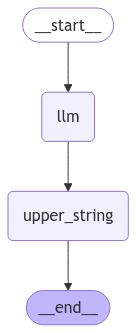

In [13]:
app

In [14]:
response = app.invoke("what is machine learning")
print(response)

MACHINE LEARNING (ML) IS A SUBSET OF ARTIFICIAL INTELLIGENCE (AI) THAT INVOLVES THE USE OF ALGORITHMS AND STATISTICAL MODELS TO ENABLE MACHINES TO LEARN FROM DATA, MAKE PREDICTIONS, AND IMPROVE THEIR PERFORMANCE OVER TIME. THE GOAL OF MACHINE LEARNING IS TO DEVELOP SYSTEMS THAT CAN AUTOMATICALLY LEARN AND IMPROVE FROM EXPERIENCE, WITHOUT BEING EXPLICITLY PROGRAMMED.

**KEY CHARACTERISTICS OF MACHINE LEARNING:**

1. **LEARNING FROM DATA**: MACHINE LEARNING ALGORITHMS LEARN FROM DATA, WHICH CAN BE IN THE FORM OF IMAGES, TEXT, AUDIO, OR OTHER TYPES OF DATA.
2. **PATTERN RECOGNITION**: MACHINE LEARNING ALGORITHMS IDENTIFY PATTERNS IN THE DATA, WHICH ALLOWS THEM TO MAKE PREDICTIONS OR DECISIONS.
3. **IMPROVEMENT OVER TIME**: MACHINE LEARNING ALGORITHMS IMPROVE THEIR PERFORMANCE OVER TIME, AS THEY LEARN FROM MORE DATA AND ADAPT TO NEW SITUATIONS.
4. **AUTONOMY**: MACHINE LEARNING ALGORITHMS CAN OPERATE AUTONOMOUSLY, WITHOUT HUMAN INTERVENTION, ONCE THEY HAVE BEEN TRAINED.

**TYPES OF MACHINE

### Agent_RAG_Tool

In [15]:
import os
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_aPI_KEY")

from langchain_ollama import OllamaEmbeddings
embeddings = OllamaEmbeddings(model="llama3.2:latest")

In [16]:
llm = ChatGroq(model_name="llama-3.3-70b-versatile")

In [17]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import DirectoryLoader,TextLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [18]:
loader=TextLoader(file_path=r"C:\Users\ADMIN\OneDrive\Desktop\Git\END-TO_END_LANGGRAPH\END-TO_END_LANGGRAPH\llama.txt")
docs = loader.load()
text_spliter = RecursiveCharacterTextSplitter(chunk_size=300,chunk_overlap=50)
new_doc = text_spliter.split_documents(documents=docs)

In [19]:
db = Chroma.from_documents(new_doc, embeddings)
retriver = db.as_retriever(search_kwargs={"k":3})

In [20]:
new_doc

[Document(metadata={'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}, page_content="Meta's Llama 3, unveiled in April 2024, represents a significant advancement in large language models (LLMs), building upon its predecessor, Llama 2. This latest iteration showcases substantial improvements in training data volume, model architecture, and multilingual capabilities, positioning it as"),
 Document(metadata={'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}, page_content='and multilingual capabilities, positioning it as a formidable competitor in the AI landscape.'),
 Document(metadata={'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}, page_content='Training and Architecture'),
 Document(metadata={'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}, page_con

In [22]:
query = "what is llama3?"
docs = retriver.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)
print(docs)

for doc in docs:
    print(doc)

{'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}
Meta's Llama 3, unveiled in April 2024, represents a significant advancement in large language models (LLMs), building upon its predecessor, Llama 2. This latest iteration showcases substantial improvements in training data volume, model architecture, and multilingual capabilities, positioning it as
[Document(metadata={'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}, page_content="Meta's Llama 3, unveiled in April 2024, represents a significant advancement in large language models (LLMs), building upon its predecessor, Llama 2. This latest iteration showcases substantial improvements in training data volume, model architecture, and multilingual capabilities, positioning it as"), Document(metadata={'source': 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\Git\\END-TO_END_LANGGRAPH\\END-TO_END_LANGGRAPH\\llama.txt'}, page_content

In [66]:
def function_1(agentstate):
    
    question = agentstate["message"][-1]
    
    query = "Your task is to provide only the brief answer based on the user query.  \ Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(query)
    
    agentstate['message'].append(response.content)
    
    return agentstate

In [67]:
def function_2(agentstate):
    message = agentstate['message']
    question = message[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = PromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriver, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [68]:
# Define a Langchain graph
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app = workflow4.compile()

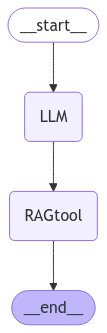

In [69]:
app

In [70]:
input = {"message":["Tell me about llama3"]}

In [73]:
app.invoke(input)

'Llama 3, unveiled in April 2024, is a significant advancement in large language models (LLMs). It builds upon its predecessor, Llama 2, and showcases substantial improvements in training data volume, model architecture, and multilingual capabilities.'

In [72]:
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'message': ['Tell me about llama3', 'Llama3 is an artificial intelligence model developed by Meta, designed for natural language processing and understanding.']}

---

Output from node 'RAGtool':
---
Llama 3, unveiled in April 2024, represents a significant advancement in large language models (LLMs), building upon its predecessor, Llama 2. It showcases substantial improvements in training data volume, model architecture, and multilingual capabilities.

---

